In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
print("Name : Subhash")
print("Register Number : 212224240163")
print("Experiment : Neural Network Regression Model\n")


Name : Subhash
Register Number : 007
Experiment : Neural Network Regression Model



In [12]:
data = {
    'Input':  [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20],
    'Output': [5,11,17,23,29,35,41,47,53,59,
               65,71,77,83,89,95,101,107,113,119]
}

dataset = pd.DataFrame(data)


In [13]:
X = dataset[['Input']].values
y = dataset[['Output']].values


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [29]:
# Name: SUBHASH V
# Reg.No: 212224240163

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)   # Regression output
        return x


In [30]:
subhash = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(subhash.parameters(), lr=0.001)


In [19]:
print("Model Architecture:")
print("Input(1) → Linear(8) → ReLU → Linear(10) → ReLU → Linear(1)\n")


Model Architecture:
Input(1) → Linear(8) → ReLU → Linear(10) → ReLU → Linear(1)



In [20]:
def train_model(model, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        model.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}] - Loss: {loss.item():.6f}")


In [21]:
train_model(subhash, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000] - Loss: 4495.078125
Epoch [200/2000] - Loss: 3713.531250
Epoch [400/2000] - Loss: 2564.027100
Epoch [600/2000] - Loss: 1349.354858
Epoch [800/2000] - Loss: 569.967834
Epoch [1000/2000] - Loss: 374.270721
Epoch [1200/2000] - Loss: 289.971008
Epoch [1400/2000] - Loss: 191.405991
Epoch [1600/2000] - Loss: 102.914841
Epoch [1800/2000] - Loss: 36.315891


In [22]:
with torch.no_grad():
    test_loss = criterion(subhash(X_test_tensor), y_test_tensor)
    print(f"\nTest Loss: {test_loss.item():.6f}")



Test Loss: 10.835576


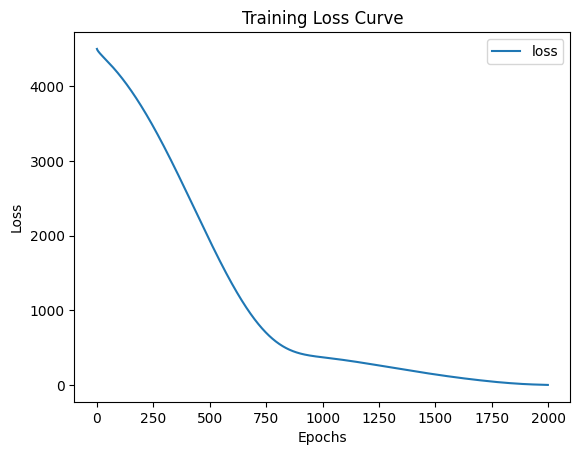

In [23]:
loss_df = pd.DataFrame(subhash.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [24]:
X_new = torch.tensor([[9]], dtype=torch.float32)
X_new_scaled = torch.tensor(scaler.transform(X_new), dtype=torch.float32)

prediction = subhash(X_new_scaled).item()
print(f"Prediction for Input = 9 : {prediction}")


Prediction for Input = 9 : 54.1783561706543
